In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas_profiling as pp
import scipy.stats as stats
from sklearn import metrics
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from math import sqrt


%matplotlib inline

In [2]:
#I want to experiment with throwing a lot of variables at the model

In [3]:
pd.set_option('display.max_columns', 999)

In [4]:
#imported both data sets

In [5]:
train = pd.read_csv('../datasets/train_clean.csv')

In [6]:
test = pd.read_csv('../datasets/test_clean.csv')

In [7]:
features =['lot_area', 'overall_qual', 'overall_cond', 'year_built',
        'year_remod_add', '1st_flr_sf', '2nd_flr_sf', 'gr_liv_area',
        'full_bath', 'half_bath', 'bedroom_abvgr', 'totrms_abvgrd',
        'fireplaces', 'wood_deck_sf', 'open_porch_sf', 'enclosed_porch',
        '3ssn_porch', 'screen_porch', 'mo_sold', 'yr_sold', 'lot_frontage',
        'mas_vnr_area', 'total_bsmt_sf', 'bsmt_full_bath',
        'bsmt_half_bath', 'garage_yr_blt', 'garage_cars', 'garage_area']
X_train = train[features]
X_test = test[features]
y_train_overfit = train['saleprice']

In [8]:
#Create PolynomialFeatures

In [9]:
poly= PolynomialFeatures(degree=2, interaction_only=False, include_bias=False)

#instatiate a model

In [10]:
X_train_overfit = poly.fit_transform(X_train)
X_test_overfit = poly.fit_transform(X_test)

In [11]:
ss_overfit = StandardScaler()

In [12]:
lr=LinearRegression()

In [13]:
lr.fit(X_train_overfit, y_train_overfit)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [14]:
predictions = lr.predict(X_train_overfit)
train['predictions'] = predictions
residuals = train['saleprice'] - train['predictions']

In [15]:
r2_score(y_train_overfit, predictions)

0.9460476051088471

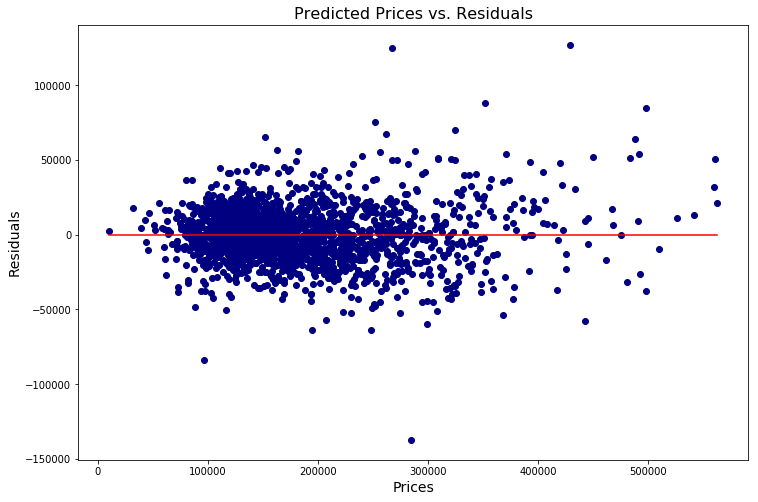

In [16]:
plt.figure(figsize = (12,8))
plt.scatter(train['predictions'],(residuals),c='navy');
plt.title('Predicted Prices vs. Residuals', size=16)
plt.xlabel('Prices', size=14)
plt.ylabel('Residuals', size=14);
plt.plot((np.min(train['predictions']), np.max(train['predictions'])),
         (np.mean(residuals), np.mean(residuals)),
         color='r');

In [17]:
#create Ridge Model

In [18]:
ridge_mod = Ridge(alpha=10)

In [19]:
ridge_mod.fit(X_train_overfit, y_train_overfit)

/Users/jerelnovick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=6.24708e-21): result may not be accurate.
  overwrite_a=True).T


Ridge(alpha=10, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [20]:
ridge_predictions = ridge_mod.predict(X_train_overfit)

In [21]:
r2_score(y_train_overfit, ridge_predictions)

0.9447621249509318

In [22]:
r_alph = np.logspace(0, 10, 200)

In [23]:
ridge_mod = RidgeCV(alphas=r_alph, scoring='r2', cv=5)

In [24]:
ridge_mod = ridge_mod.fit(X_train_overfit, y_train_overfit)

/Users/jerelnovick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=5.78028e-22): result may not be accurate.
  overwrite_a=True).T
/Users/jerelnovick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=3.45926e-21): result may not be accurate.
  overwrite_a=True).T
/Users/jerelnovick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=6.5536e-22): result may not be accurate.
  overwrite_a=True).T
/Users/jerelnovick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=5.25938e-22): result may not be accurate.
  overwrite_a=True).T
/Users/jerelnovick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=4.36447e-22): result may not be accurate.
  overwrite_a=True

/Users/jerelnovick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=1.10087e-21): result may not be accurate.
  overwrite_a=True).T
/Users/jerelnovick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=1.63495e-21): result may not be accurate.
  overwrite_a=True).T
/Users/jerelnovick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=9.78469e-21): result may not be accurate.
  overwrite_a=True).T
/Users/jerelnovick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=1.86492e-21): result may not be accurate.
  overwrite_a=True).T
/Users/jerelnovick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=1.49114e-21): result may not be accurate.
  overwrite_a=Tru

/Users/jerelnovick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=2.46625e-20): result may not be accurate.
  overwrite_a=True).T
/Users/jerelnovick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=4.31817e-21): result may not be accurate.
  overwrite_a=True).T
/Users/jerelnovick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=3.7685e-21): result may not be accurate.
  overwrite_a=True).T
/Users/jerelnovick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=3.11567e-21): result may not be accurate.
  overwrite_a=True).T
/Users/jerelnovick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=4.61835e-21): result may not be accurate.
  overwrite_a=True

/Users/jerelnovick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=1.09493e-20): result may not be accurate.
  overwrite_a=True).T
/Users/jerelnovick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=9.55547e-21): result may not be accurate.
  overwrite_a=True).T
/Users/jerelnovick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=7.85169e-21): result may not be accurate.
  overwrite_a=True).T
/Users/jerelnovick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=1.16084e-20): result may not be accurate.
  overwrite_a=True).T
/Users/jerelnovick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=6.99484e-20): result may not be accurate.
  overwrite_a=Tru

/Users/jerelnovick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=2.42496e-20): result may not be accurate.
  overwrite_a=True).T
/Users/jerelnovick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=1.97749e-20): result may not be accurate.
  overwrite_a=True).T
/Users/jerelnovick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=2.91621e-20): result may not be accurate.
  overwrite_a=True).T
/Users/jerelnovick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=1.75861e-19): result may not be accurate.
  overwrite_a=True).T
/Users/jerelnovick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=3.15204e-20): result may not be accurate.
  overwrite_a=Tru

/Users/jerelnovick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=4.9768e-20): result may not be accurate.
  overwrite_a=True).T
/Users/jerelnovick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=7.33974e-20): result may not be accurate.
  overwrite_a=True).T
/Users/jerelnovick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=4.3407e-19): result may not be accurate.
  overwrite_a=True).T
/Users/jerelnovick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=8.25927e-20): result may not be accurate.
  overwrite_a=True).T
/Users/jerelnovick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=6.91181e-20): result may not be accurate.
  overwrite_a=True)

/Users/jerelnovick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=2.09296e-19): result may not be accurate.
  overwrite_a=True).T
/Users/jerelnovick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=1.20209e-18): result may not be accurate.
  overwrite_a=True).T
/Users/jerelnovick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=2.04548e-19): result may not be accurate.
  overwrite_a=True).T
/Users/jerelnovick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=1.97784e-19): result may not be accurate.
  overwrite_a=True).T
/Users/jerelnovick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=1.57604e-19): result may not be accurate.
  overwrite_a=Tru

/Users/jerelnovick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=5.3319e-19): result may not be accurate.
  overwrite_a=True).T
/Users/jerelnovick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=5.07471e-19): result may not be accurate.
  overwrite_a=True).T
/Users/jerelnovick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=3.96077e-19): result may not be accurate.
  overwrite_a=True).T
/Users/jerelnovick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=5.74006e-19): result may not be accurate.
  overwrite_a=True).T
/Users/jerelnovick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=3.36162e-18): result may not be accurate.
  overwrite_a=True

/Users/jerelnovick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=1.48765e-18): result may not be accurate.
  overwrite_a=True).T
/Users/jerelnovick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=1.11673e-18): result may not be accurate.
  overwrite_a=True).T
/Users/jerelnovick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=1.52059e-18): result may not be accurate.
  overwrite_a=True).T
/Users/jerelnovick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=9.49069e-18): result may not be accurate.
  overwrite_a=True).T
/Users/jerelnovick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=1.62625e-18): result may not be accurate.
  overwrite_a=Tru

/Users/jerelnovick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=3.15603e-18): result may not be accurate.
  overwrite_a=True).T
/Users/jerelnovick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=4.1859e-18): result may not be accurate.
  overwrite_a=True).T
/Users/jerelnovick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=2.72612e-17): result may not be accurate.
  overwrite_a=True).T
/Users/jerelnovick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=4.57213e-18): result may not be accurate.
  overwrite_a=True).T
/Users/jerelnovick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=4.20925e-18): result may not be accurate.
  overwrite_a=True

/Users/jerelnovick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=7.13679e-17): result may not be accurate.
  overwrite_a=True).T
/Users/jerelnovick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=1.18383e-17): result may not be accurate.
  overwrite_a=True).T
/Users/jerelnovick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=1.07551e-17): result may not be accurate.
  overwrite_a=True).T
/Users/jerelnovick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=9.01791e-18): result may not be accurate.
  overwrite_a=True).T
/Users/jerelnovick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=1.20251e-17): result may not be accurate.
  overwrite_a=Tru

/Users/jerelnovick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=2.64512e-17): result may not be accurate.
  overwrite_a=True).T
/Users/jerelnovick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=3.53253e-17): result may not be accurate.
  overwrite_a=True).T
/Users/jerelnovick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=4.18303e-17): result may not be accurate.
  overwrite_a=True).T
/Users/jerelnovick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=3.62054e-17): result may not be accurate.
  overwrite_a=True).T
/Users/jerelnovick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=2.98623e-17): result may not be accurate.
  overwrite_a=Tru

In [25]:
ridge_mod.alpha_

10000000000.0

In [26]:
y_train_ridge_pred = ridge_mod.predict(X_train_overfit)
y_test_ridge_pred = ridge_mod.predict(X_test_overfit)

In [27]:
r2_score(y_train_overfit, y_train_ridge_pred)

0.9125216458661609

In [28]:
predictions = y_train_ridge_pred
train['predictions'] = predictions
residuals = train['saleprice'] - train['predictions']

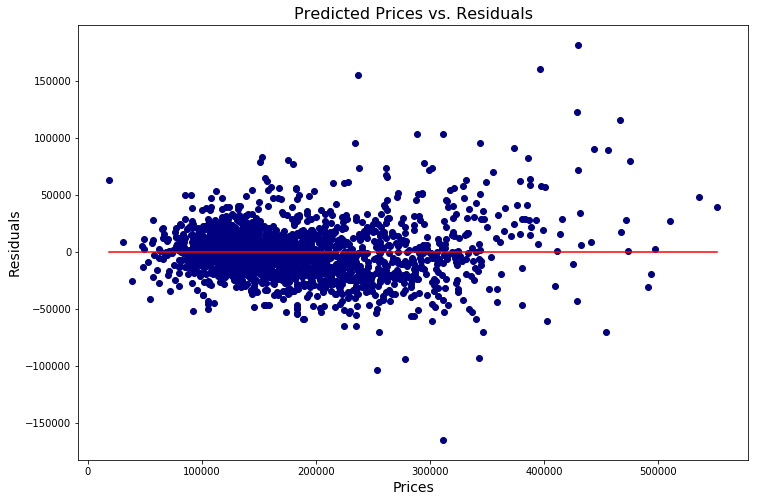

In [29]:
plt.figure(figsize = (12,8))
plt.scatter(train['predictions'],(residuals),c='navy');
plt.title('Predicted Prices vs. Residuals', size=16)
plt.xlabel('Prices', size=14)
plt.ylabel('Residuals', size=14);
plt.plot((np.min(train['predictions']), np.max(train['predictions'])),
         (np.mean(residuals), np.mean(residuals)),
         color='r');

In [30]:
#create Lasso model

In [31]:
las_alph = np.logspace(-3, 0, 100)

In [32]:
las_mod = LassoCV(alphas=las_alph, cv=5)

In [33]:
las_mod = las_mod.fit(X_train_overfit, y_train_overfit)

/Users/jerelnovick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/jerelnovick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/jerelnovick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/jerelnovick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarni

/Users/jerelnovick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/jerelnovick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/jerelnovick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/jerelnovick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarni

/Users/jerelnovick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/jerelnovick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/jerelnovick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/jerelnovick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarni

/Users/jerelnovick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/jerelnovick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/jerelnovick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/jerelnovick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarni

/Users/jerelnovick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/jerelnovick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/jerelnovick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/jerelnovick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarni

/Users/jerelnovick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/jerelnovick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/jerelnovick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/jerelnovick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarni

/Users/jerelnovick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/jerelnovick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/jerelnovick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/jerelnovick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarni

/Users/jerelnovick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/jerelnovick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/jerelnovick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/jerelnovick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarni

/Users/jerelnovick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/jerelnovick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/jerelnovick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/jerelnovick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarni

/Users/jerelnovick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/jerelnovick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/jerelnovick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/jerelnovick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarni

/Users/jerelnovick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/jerelnovick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/jerelnovick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/jerelnovick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarni

/Users/jerelnovick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/jerelnovick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/jerelnovick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/jerelnovick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarni

/Users/jerelnovick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/jerelnovick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/jerelnovick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/jerelnovick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarni

/Users/jerelnovick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/jerelnovick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/jerelnovick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/jerelnovick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarni

/Users/jerelnovick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/jerelnovick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/jerelnovick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/jerelnovick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarni

/Users/jerelnovick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/jerelnovick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/jerelnovick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/jerelnovick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarni

/Users/jerelnovick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/jerelnovick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/jerelnovick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/jerelnovick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarni

/Users/jerelnovick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/jerelnovick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/jerelnovick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/jerelnovick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarni

In [34]:
# Generate predictions
y_train_las_pred = las_mod.predict(X_train_overfit)
y_test_las_pred = las_mod.predict(X_test_overfit)

# Evaluate model.
print(r2_score(y_train_overfit, y_train_las_pred))

0.938588724577257


In [35]:
predictions = y_train_las_pred
train['predictions'] = predictions
residuals = train['saleprice'] - train['predictions']

In [36]:
las_mod.alpha_

1.0

In [37]:
r2_score(y_train_overfit, y_train_ridge_pred)

0.9125216458661609

In [38]:
ridge_mod.coef_

array([ 4.33517970e-04,  1.37775382e-04,  8.52090001e-05, -3.71933534e-05,
       -6.47479528e-05, -2.73636884e-04, -1.29759919e-06, -2.89493441e-04,
       -4.20233677e-05,  4.16468802e-05, -1.01606078e-04, -5.23763867e-05,
        4.86203825e-05, -3.22597767e-05, -6.08745367e-05, -2.18606166e-06,
        1.61065599e-06,  1.79513758e-05,  3.03672142e-05,  5.35354451e-05,
       -1.86621706e-05, -2.60240650e-04, -2.76290769e-04,  9.51134605e-05,
        2.01504148e-05, -1.03282613e-05, -3.40213970e-05, -1.31874203e-04,
       -2.77038152e-06,  7.33422872e-01,  4.77788035e-01,  6.36651843e-03,
        6.30470680e-03, -3.28093879e-04,  3.37644491e-04, -2.19106329e-03,
        1.65235267e-01,  9.80646646e-02, -3.48408918e-02,  1.04151060e-01,
        5.48604164e-01,  2.28317351e-04, -3.76362341e-03,  1.68791104e-03,
       -2.03627669e-02,  6.80591070e-03, -3.15868844e-02, -1.21955763e-02,
       -4.57645032e-03, -4.73327536e-04, -2.20372752e-03,  6.35163349e-01,
       -1.77974525e-02, -

In [39]:
las_mod.coef_

array([ 3.53798352e+00,  1.66282411e+04, -5.26935008e+03,  7.92331248e+02,
        3.26226536e+02,  4.68111688e+01, -2.65274180e+01, -3.96170985e+00,
       -1.50228928e+04,  7.10133459e+02, -4.30210241e+03,  3.29823556e+03,
        3.37150772e+03,  3.16546810e+01, -2.31886493e+01,  1.40048890e+02,
       -5.98920799e+02, -3.05650624e+01,  2.22003811e+03,  4.40577056e+02,
       -1.74277301e+02, -6.59377213e+01,  1.34142475e+01,  6.12365849e+03,
        0.00000000e+00, -2.26520226e+01,  7.45418638e+02, -1.60229607e+01,
       -1.52718505e-05,  2.69938711e-01,  4.32807101e-01, -1.38566786e-03,
       -2.60512708e-04, -1.89138122e-03, -1.67120445e-03,  2.89313354e-04,
        7.94833480e-02, -6.64205861e-01,  5.20318270e-01, -2.06658633e-01,
        1.68323137e-01,  1.66268151e-03,  2.03324357e-03, -5.38123561e-03,
       -7.75140242e-03,  6.41740576e-03, -1.05638213e-02,  8.80534591e-04,
       -1.00239078e-02,  1.73833229e-04, -3.79319506e-04, -6.61915719e-03,
       -2.71134703e-01, -

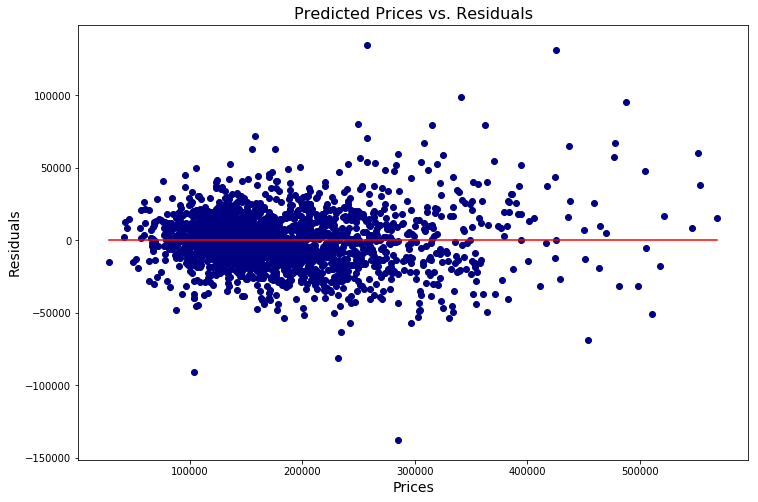

In [40]:
plt.figure(figsize = (12,8))
plt.scatter(train['predictions'],(residuals),c='navy');
plt.title('Predicted Prices vs. Residuals', size=16)
plt.xlabel('Prices', size=14)
plt.ylabel('Residuals', size=14);
plt.plot((np.min(train['predictions']), np.max(train['predictions'])),
         (np.mean(residuals), np.mean(residuals)),
         color='r');

In [41]:
#created a new dataframe for me submission 

In [42]:
submission = pd.DataFrame(columns=[])

In [43]:
#assigned data to dataframe

In [44]:
#submission = pd.DataFrame(columns=[test['id']
submission['Id'] = test['id']
submission['SalePrice'] = y_test_ridge_pred

In [45]:
submission.to_csv('../submissions/submission_eight.csv',index=False)

In [46]:
submission['SalePrice'] = y_test_las_pred

In [47]:
submission.to_csv('../submissions/submission_nine.csv',index=False)